In [1]:
#pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 500)
pal = sns.color_palette()

In [3]:
df = pd.read_csv("C:/Users/cj.alonzo/OneDrive - Nice Systems Ltd/Documents/Personal/Data Science/personal projects/delays/flight_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41566896 entries, 0 to 41566895
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY_OF_MONTH         int64  
 3   DAY_OF_WEEK          int64  
 4   OP_UNIQUE_CARRIER    object 
 5   ORIGIN               object 
 6   ORIGIN_CITY_NAME     object 
 7   DEST                 object 
 8   DEST_CITY_NAME       object 
 9   DEP_DELAY            float64
 10  DEP_DEL15            float64
 11  ARR_DELAY            float64
 12  ARR_DEL15            float64
 13  CANCELLED            float64
 14  CANCELLATION_CODE    object 
 15  DIVERTED             float64
 16  CARRIER_DELAY        float64
 17  WEATHER_DELAY        float64
 18  NAS_DELAY            float64
 19  SECURITY_DELAY       float64
 20  LATE_AIRCRAFT_DELAY  float64
 21  Description          object 
 22  DelayGroup           object 
 23  DelayOk              object 
d

In [5]:
df.isnull().sum().sort_values(ascending = False)

CANCELLATION_CODE      40582766
ARR_DEL15               1082655
ARR_DELAY               1082655
DEP_DELAY                962260
DEP_DEL15                962260
DelayGroup                  639
DelayOk                     639
DEST                          0
CARRIER_DELAY                 0
DAY_OF_MONTH                  0
Description                   0
LATE_AIRCRAFT_DELAY           0
SECURITY_DELAY                0
NAS_DELAY                     0
WEATHER_DELAY                 0
DIVERTED                      0
DEST_CITY_NAME                0
DAY_OF_WEEK                   0
CANCELLED                     0
MONTH                         0
OP_UNIQUE_CARRIER             0
ORIGIN                        0
ORIGIN_CITY_NAME              0
YEAR                          0
dtype: int64

In [6]:
dataframe = [df]
columns_to_fill = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

for df in dataframe:
    df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [7]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Description,DelayGroup,DelayOk
0,2018,12,1,6,9E,AEX,"Alexandria, LA",ATL,"Atlanta, GA",-5.0,0.0,-14.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Early or On Time,Good
1,2018,12,1,6,9E,AEX,"Alexandria, LA",ATL,"Atlanta, GA",0.0,0.0,9.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Early or On Time,Good
2,2018,12,1,6,9E,AGS,"Augusta, GA",ATL,"Atlanta, GA",-10.0,0.0,-20.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Early or On Time,Good
3,2018,12,1,6,9E,AGS,"Augusta, GA",ATL,"Atlanta, GA",-10.0,0.0,-1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Early or On Time,Good
4,2018,12,1,6,9E,AGS,"Augusta, GA",ATL,"Atlanta, GA",1.0,0.0,3.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Small Delay,Good


In [8]:
# filter delays greater than 0 minutes and less than 30 minutes
filtered_delays = df[(df['DEP_DELAY'] > 0) & (df['DEP_DELAY'] < 30)]

# group data by 'DEP_DELAY', count each unique variable, create a new column when resetting, and rename the column with the counts as Count
grouped_delay = filtered_delays.groupby('DEP_DELAY').size().reset_index().rename(columns={0: 'Count'})

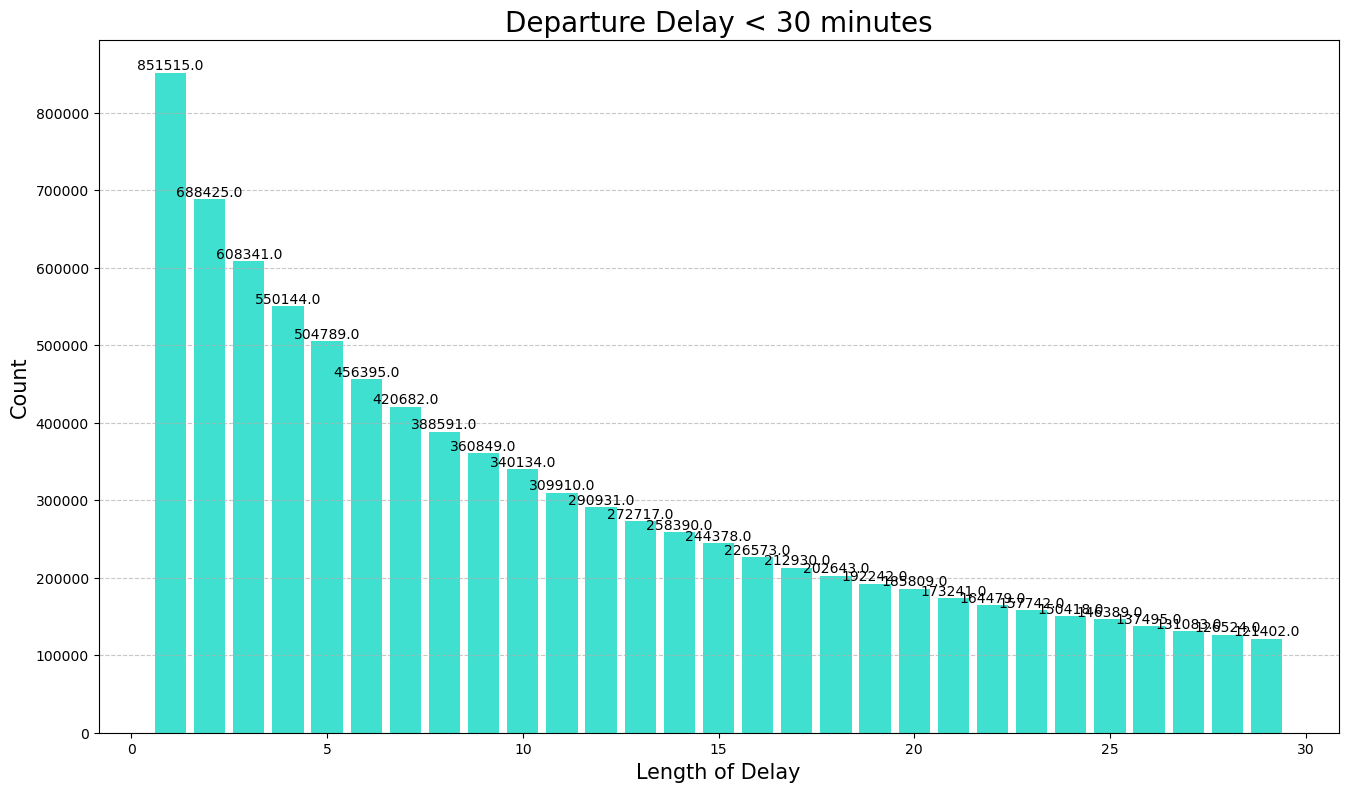

In [9]:
# bar graph
plt.figure(figsize=(16, 9))
plt.bar(data=grouped_delay, x='DEP_DELAY', height='Count', color='turquoise')

# Ttitle and axis labels
plt.title('Departure Delay < 30 minutes', fontsize=20)
plt.xlabel('Length of Delay', fontsize=15)
plt.ylabel('Count', fontsize=15)

# grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# value labels above each bar
for index, row in grouped_delay.iterrows():
    plt.text(row['DEP_DELAY'], row['Count'], str(row['Count']), ha='center', va='bottom', fontsize=10)

plt.show()

In [10]:
# new column specifying how bad the delay was
df["DelayGroup"] = None
df.loc[df["DEP_DELAY"] <= 0, "DelayGroup"] = "Early or On Time"
df.loc[(df["DEP_DELAY"] > 0) & (df["DEP_DELAY"] <= 15), "DelayGroup"] = "Small Delay"
df.loc[(df["DEP_DELAY"] > 15) & (df["DEP_DELAY"] <= 45), "DelayGroup"] = "Medium Delay"
df.loc[df["DEP_DELAY"] > 45, "DelayGroup"] = "Large Delay"
df.loc[df["CANCELLED"] == 1, "DelayGroup"] = "Cancelled"

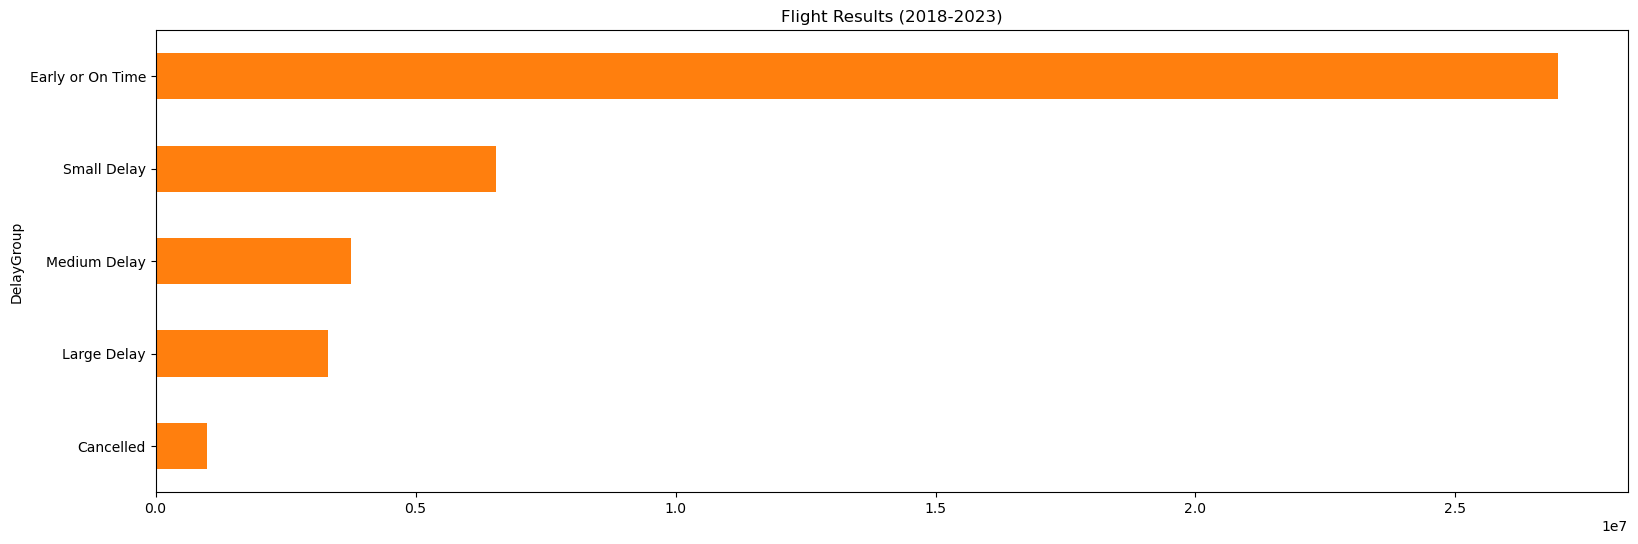

In [11]:
# most flights were early or on time
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(19, 6), color=pal[1], title="Flight Results (2018-2023)"
)
plt.show()

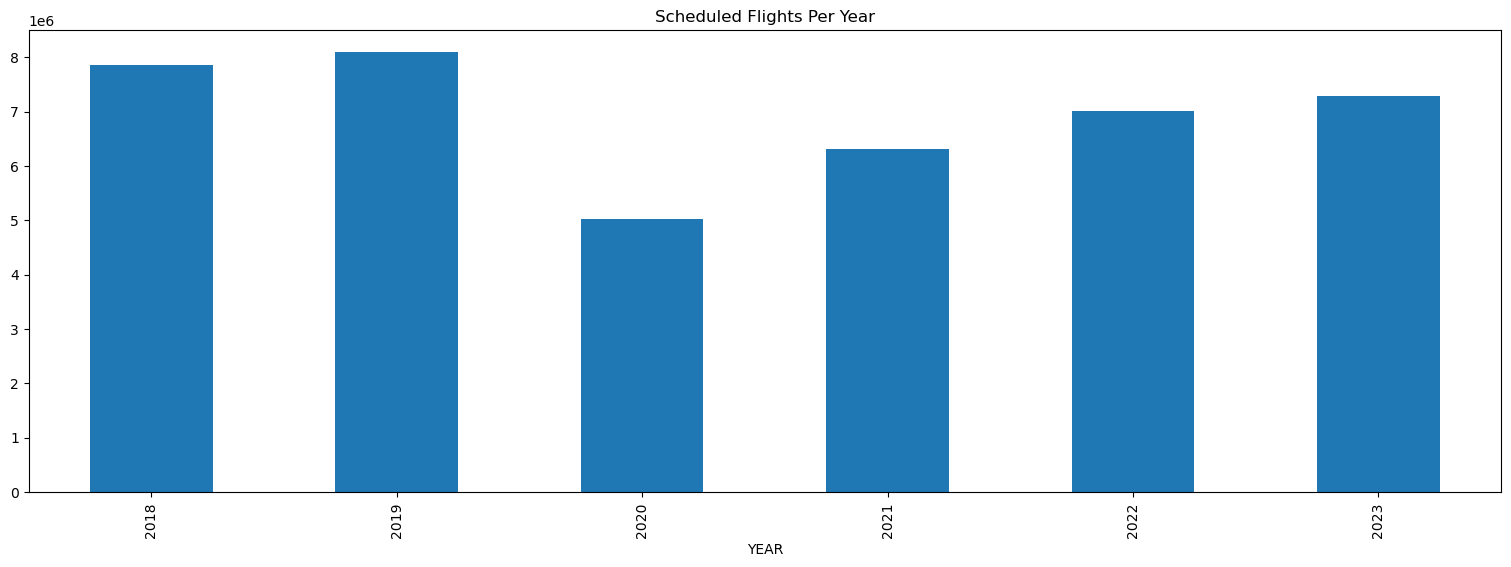

In [12]:
df["YEAR"].value_counts().sort_index().plot(
    kind="bar", figsize=(19, 6), title="Scheduled Flights Per Year"
)
plt.show()

In [13]:
df.shape

(41566896, 24)

In [14]:
df.isnull().sum().sort_values(ascending=False)*100/41566896

CANCELLATION_CODE      97.632419
ARR_DEL15               2.604609
ARR_DELAY               2.604609
DEP_DELAY               2.314967
DEP_DEL15               2.314967
DelayGroup              0.001537
DelayOk                 0.001537
DEST                    0.000000
CARRIER_DELAY           0.000000
DAY_OF_MONTH            0.000000
Description             0.000000
LATE_AIRCRAFT_DELAY     0.000000
SECURITY_DELAY          0.000000
NAS_DELAY               0.000000
WEATHER_DELAY           0.000000
DIVERTED                0.000000
DEST_CITY_NAME          0.000000
DAY_OF_WEEK             0.000000
CANCELLED               0.000000
MONTH                   0.000000
OP_UNIQUE_CARRIER       0.000000
ORIGIN                  0.000000
ORIGIN_CITY_NAME        0.000000
YEAR                    0.000000
dtype: float64

In [15]:
#no dep_delay bc they were cancelled?
cancelled_flights = df[df['DelayGroup'] == 'Cancelled']

In [16]:
#a lot cancelled in 2020. when?
df_yr = df.groupby("YEAR")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay", "Cancelled"]
df_yr[col_order].style.background_gradient(cmap="Greens")

DelayGroup,Early or On Time,Small Delay,Medium Delay,Large Delay,Cancelled
YEAR,,,,,
2018,64.830637,15.933267,9.224206,8.298180,1.713711
2019,64.619787,15.716778,9.081583,8.683248,1.898604
2020,76.052291,9.653418,4.572319,3.727722,5.994249
2021,65.698142,16.145308,8.917879,7.479795,1.758876
2022,59.723508,17.716455,10.719457,9.130980,2.709600
2023,61.851771,17.511096,10.378158,8.968957,1.290017


In [17]:
#most cancelled in march and april. makes sense.
df_month = df.groupby("MONTH")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay", "Cancelled"]
df_month[col_order].style.background_gradient(cmap="Blues")

DelayGroup,Early or On Time,Small Delay,Medium Delay,Large Delay,Cancelled
MONTH,,,,,
1,66.825469,14.522017,8.316177,7.491416,2.844920
2,65.160405,15.384744,8.880303,7.788854,2.785694
3,65.401361,14.890118,8.335007,6.706282,4.667233
4,63.887645,14.684724,8.400502,7.389021,5.638109
5,65.184606,16.303195,9.042541,7.859994,1.609664
6,58.953238,17.387546,10.942506,10.701730,2.014980
7,60.393639,16.609287,10.482943,10.665889,1.848242
8,62.960921,15.764529,9.752452,9.477220,2.044877
9,70.189639,14.410841,7.608803,6.401204,1.389513


In [18]:
#2020 significantly more cancellations in mar and apr than other years
df_3_4 = (
    df.query("3 <= MONTH <= 4")
    .groupby("YEAR")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay", "Cancelled"]
df_3_4[col_order].style.background_gradient(cmap="Oranges", axis=0)

DelayGroup,Early or On Time,Small Delay,Medium Delay,Large Delay,Cancelled
YEAR,,,,,
2018,66.124296,16.163578,8.808263,6.883017,2.020847
2019,65.790141,15.462990,8.614418,7.974924,2.157527
2020,63.063286,6.202543,3.291875,2.733237,24.709059
2021,76.291254,13.015721,5.715776,4.077733,0.899516
2022,59.301505,18.234213,11.096981,9.445164,1.922137
2023,59.494274,17.931421,11.346514,9.729741,1.498050


In [19]:
#other years most cancelled in jan or feb
df_2020 = (
    df.query("YEAR != 2020")
    .groupby("MONTH")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay", "Cancelled"]
df_2020[col_order].style.background_gradient(cmap="Blues")

DelayGroup,Early or On Time,Small Delay,Medium Delay,Large Delay,Cancelled
MONTH,,,,,
1,65.765985,14.595766,8.560286,7.859397,3.218565
2,63.635218,15.817127,9.294521,8.026842,3.226291
3,64.837064,16.548831,9.299773,7.471380,1.842952
4,65.107891,15.991192,9.177598,8.066515,1.656804
5,64.109034,16.898655,9.446817,8.230957,1.314538
6,57.093568,17.969794,11.489986,11.313195,2.133456
7,57.758525,17.541098,11.233217,11.499626,1.967535
8,60.368929,16.684805,10.499582,10.285184,2.161498
9,68.480883,15.090006,8.105621,6.859424,1.464067


In [20]:
# reset Description categories
df["Description"] = df["Description"].astype("str").astype("category")

# count each instance of airline
airline_counts = df["Description"].value_counts()

print('Total Airline Flights \n', airline_counts, '\n')

Total Airline Flights 
 Description
Southwest Airlines Co.                  7488028
Delta Air Lines                         5148525
American Airlines                       4984475
SkyWest Airlines                        4370348
United Air Lines                        3361214
Republic Airline                        1810930
Envoy Air                               1565947
JetBlue Airways                         1497196
Endeavor Air                            1415179
PSA Airlines                            1391273
Alaska Airlines                         1311487
Spirit Air Lines                        1203757
Mesa Airlines                            941793
Frontier Airlines                        816916
Allegiant Air                            648312
Horizon Air                              600159
Piedmont Airlines                        577356
Air Wisconsin Airlines Corp              467463
Hawaiian Airlines                        416162
ExpressJet Airlines  d/b/a aha!          389187
GoJe

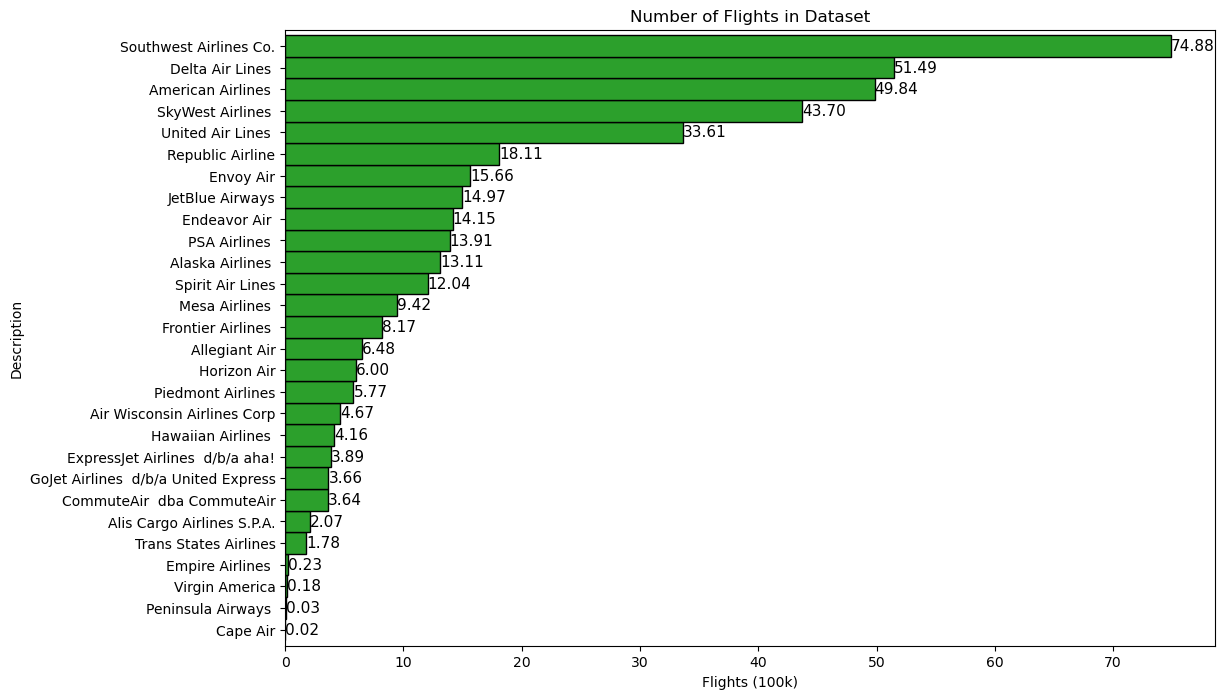

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

# horizontal bar plot
airlines_ordered = (df["Description"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)

# count labels next to each bar
for bar in airlines_ordered.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.2f}',
             va='center', ha='left', fontsize=11)

ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")
plt.show()

In [22]:
# group airline and delay group, calculate the normalized counts
df_agg = (
    df.groupby(["Description", "DelayGroup"])
    .size()
    .unstack()
    .fillna(0)
    .apply(lambda x: x / x.sum(), axis=1)
)

# count instances of each airline
airline_counts = df["Description"].value_counts()

# filter airlines with at least 400,000 flights
filtered_airlines = airline_counts[airline_counts >= 400000].index

# filter DataFrame based on selected airlines
df_filtered = df[df["Description"].isin(filtered_airlines)]

In [23]:
# group by airline and delay group, calculate the normalized counts again
df_agg = (
    df_filtered.groupby(["Description", "DelayGroup"])
    .size()
    .unstack()
    .fillna(0)
    .apply(lambda x: x / x.sum(), axis=1)
)

# sort the airlines based on total flights
df_agg_sorted = df_agg.loc[airline_counts.loc[filtered_airlines].sort_values(ascending=True).index]

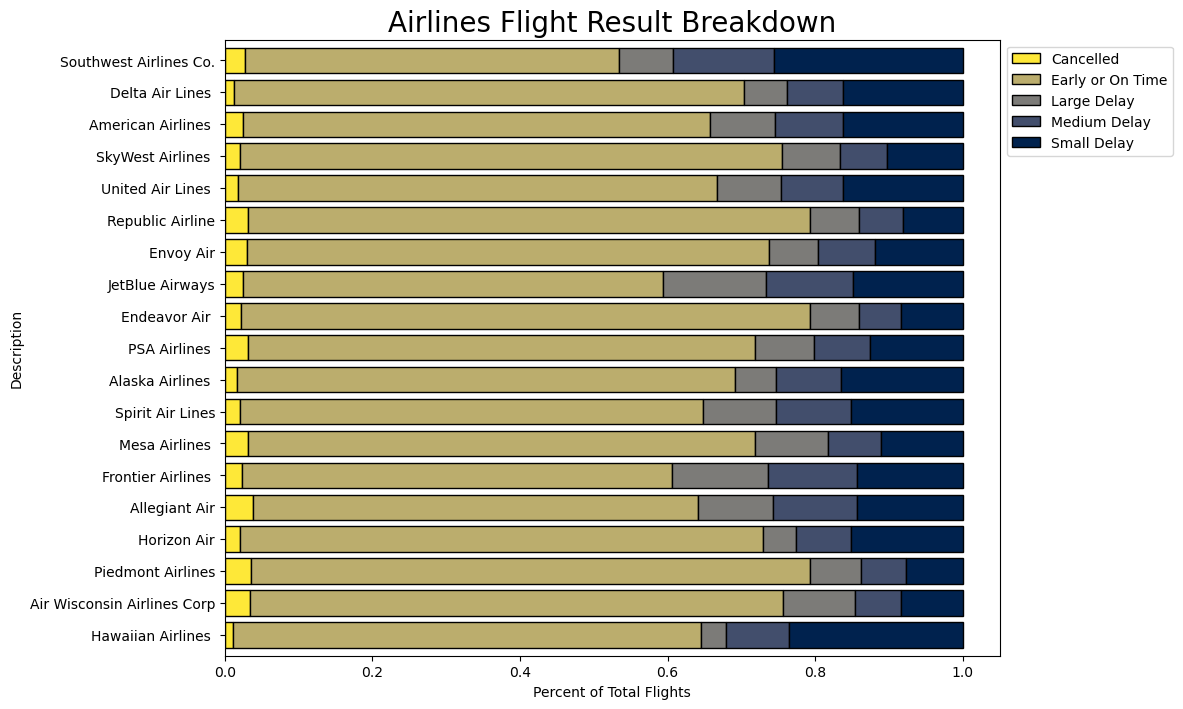

In [24]:
# choose a colormap (e.g., 'viridis')
cmap = plt.get_cmap('cividis_r')

# stacked bar plot with colormap
fig, ax = plt.subplots(figsize=(10, 8))
df_agg_sorted.plot(kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black", colormap=cmap)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [25]:
# dictionary to make chart saying if a flight has more good ones than bad based off of delay
delay_mapping = {
    "Early or On Time": "Good",
    "Small Delay": "Good",
    "Medium Delay": "Bad",
    "Large Delay": "Bad",
    "Cancelled": "Bad",
}

In [26]:
df["DelayOk"] = df["DelayGroup"].map(delay_mapping)

In [27]:
#filtering using chunks since my laptop can't handle 4.1mil rows at once
chunk_size = 10000
filtered_chunks = []
for chunk in pd.read_csv('flight_data.csv', chunksize=chunk_size):
    filtered_chunk = chunk[chunk["Description"].isin(filtered_airlines)]
    filtered_chunks.append(filtered_chunk)

df_filtered = pd.concat(filtered_chunks)

In [28]:
# group by airline and delay group, calculate the normalized counts again
df_agg = (
    df_filtered.groupby(["Description"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

# count instances of each airline
airline_counts = df_filtered["Description"].value_counts()

# filter airlines with at least 400,000 flights
filtered_airlines = airline_counts[airline_counts >= 400000].index

# Sort the airlines based on the most "Good" delays
df_agg_sorted = df_agg.loc[filtered_airlines].sort_values(by="Good", ascending=True)

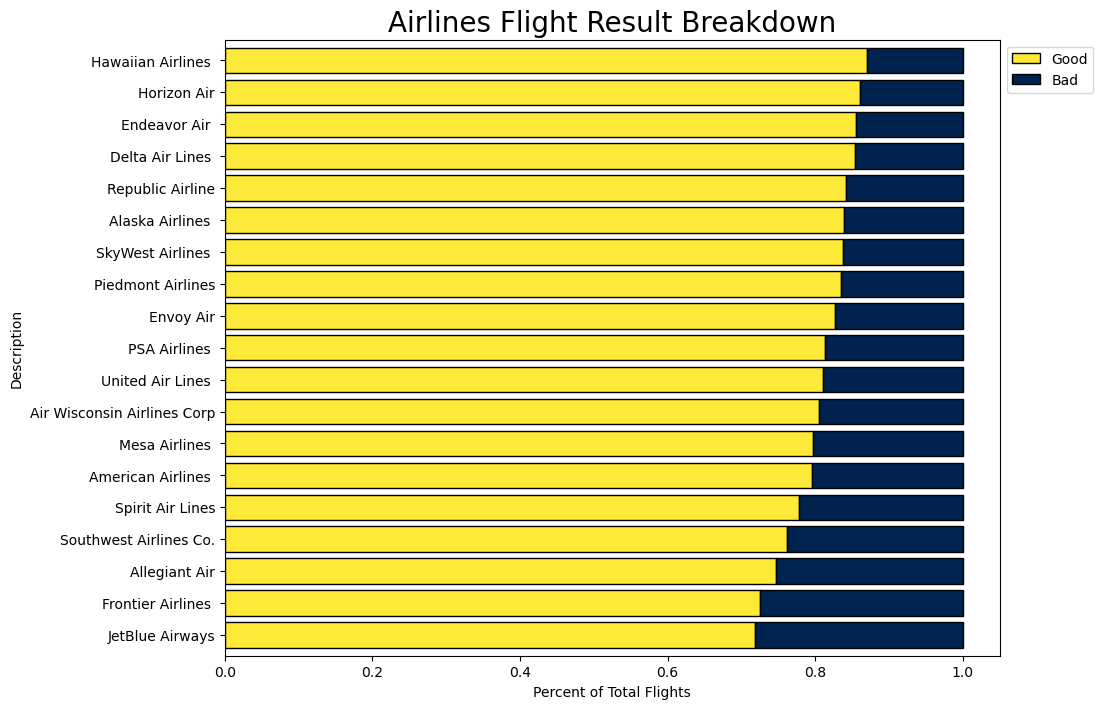

In [29]:
# stacked bar plot
fig, ax = plt.subplots(figsize=(10, 8))
df_agg_sorted.plot(kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black", colormap=cmap)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [30]:
# function that extracts statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [31]:
# create a dataframe with stats on each airline based on delay
global_stats = df['DEP_DELAY'].groupby(df['Description']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean', ascending = False)
global_stats

,min,max,count,mean
Description,,,,
Peninsula Airways,-44.0,470.0,2734.0,19.192026
JetBlue Airways,-73.0,2508.0,1460659.0,17.916025
Trans States Airlines,-51.0,1840.0,170680.0,17.068749
Frontier Airlines,-60.0,1393.0,798047.0,16.249811
CommuteAir dba CommuteAir,-68.0,1557.0,352307.0,16.046264
Allegiant Air,-66.0,2065.0,624049.0,13.383729
Mesa Airlines,-58.0,2209.0,912515.0,13.123806
Spirit Air Lines,-52.0,1587.0,1178899.0,12.606363
ExpressJet Airlines d/b/a aha!,-54.0,1839.0,374375.0,12.430178


C:\Users\cj.alonzo\AppData\Local\Temp\ipykernel_4916\3288740264.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax3 = sns.stripplot(y="Description", x="DEP_DELAY", size=4, palette=colors,


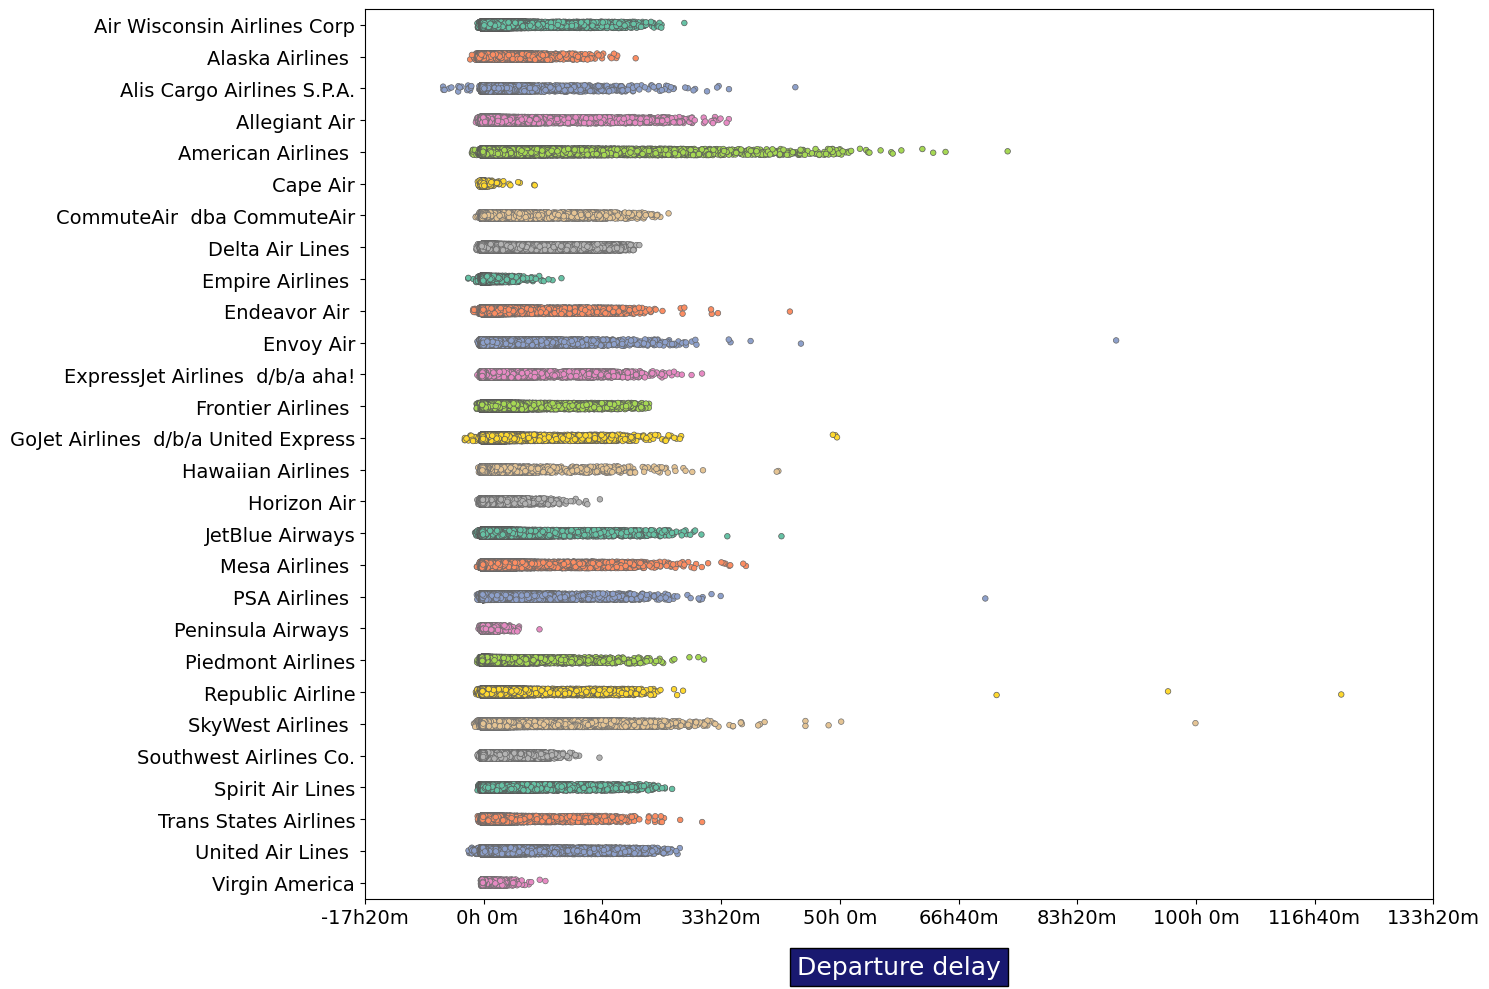

In [32]:
# striplot
colors = sns.color_palette("Set2", n_colors=28)

plt.figure(figsize=(15, 10))

ax3 = sns.stripplot(y="Description", x="DEP_DELAY", size=4, palette=colors,
                    data=df, linewidth=0.5, jitter=True)

plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*divmod(x, 60)) for x in ax3.get_xticks()],
                    fontsize=14)

plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor': 'midnightblue', 'pad': 5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)
plt.show()

In [33]:
print("Number of airports: {}".format(len(df['ORIGIN'].unique())))

Number of airports: 389


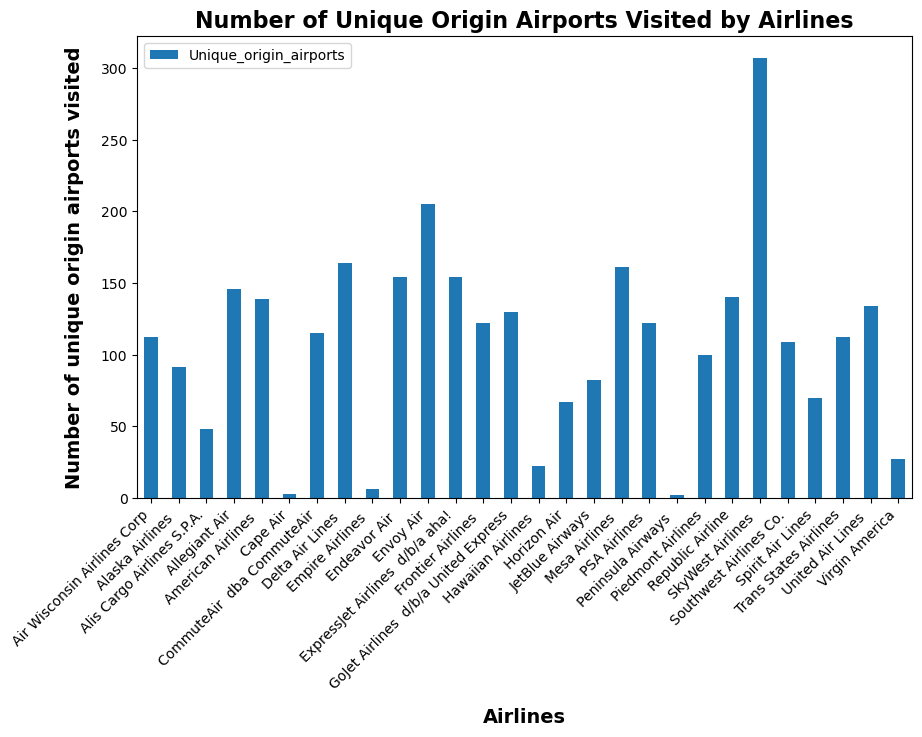

In [34]:
# count the number of unique origin airports visited per airline
unique_origin_airports = df.groupby('Description')['ORIGIN'].nunique().reset_index()

# rename the column for clarity
unique_origin_airports.rename(columns={'ORIGIN': 'Unique_origin_airports'}, inplace=True)

# plot the bar chart
ax = unique_origin_airports.set_index('Description').plot(kind='bar', figsize=(10, 6))

# set labels and title
plt.ylabel('Number of unique origin airports visited', fontsize=14, weight='bold', labelpad=12)
plt.xlabel('Airlines', fontsize=14, weight='bold', labelpad=12)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Unique Origin Airports Visited by Airlines', fontsize=16, weight='bold')

plt.show()

In [35]:
# define a function to calculate statistics
def get_stats(x):
    return pd.Series({
        'min': x.min(),
        'max': x.max(),
        'count': x.count(),
        'mean': x.mean()
    })

# calculate statistics for mean delays per airport
airport_stats = df['DEP_DELAY'].groupby(df['ORIGIN_CITY_NAME']).apply(get_stats).unstack()

# sort the statistics by count in descending order
airport_stats = airport_stats.sort_values('mean', ascending=False)

print(airport_stats)

                         min     max   count       mean
ORIGIN_CITY_NAME                                       
Youngstown/Warren, OH   15.0   111.0     2.0  63.000000
Pago Pago, TT          -37.0  2468.0   455.0  39.501099
Bishop, CA             -23.0  1207.0   592.0  32.369932
Hyannis, MA            -23.0   468.0   614.0  25.654723
Mammoth Lakes, CA      -23.0  1260.0  1175.0  23.119149
...                      ...     ...     ...        ...
Yakutat, AK            -73.0   645.0  4162.0  -4.037963
Nome, AK              -114.0   438.0  3716.0  -4.322928
Gustavus, AK           -40.0   141.0   508.0  -6.700787
Deadhorse, AK          -46.0   434.0  3766.0  -7.454859
Rota, TT               -35.0    50.0   151.0  -7.993377

[381 rows x 4 columns]
